<a href="https://colab.research.google.com/github/arjunmalik11/AI-Agents-with-Autogen/blob/main/Autogen_Financial_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install autogen
!pip install yfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.2/345.2 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.5/373.5 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.2/297.2 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.0 MB/s eta 0:00:00


In [ ]:
OPENAI_API_KEY = "secret-key"
llm_config = {
    "model" : "gpt-4-turbo",
    "api_key" : OPENAI_API_KEY,
 }

Code Executor

In [ ]:
from autogen.coding import LocalCommandLineCodeExecutor

executor = LocalCommandLineCodeExecutor(
    timeout = 60,
    work_dir= "code"
)

Creating Agents

In [7]:
from autogen import ConversableAgent, AssistantAgent

code_exec = ConversableAgent(
    name="Code_Executor",
    llm_config=False,
    code_execution_config= {"executor":executor},
    human_input_mode="ALWAYS"
)

code_writer = AssistantAgent(
    name="Code_Writer",
    llm_config=llm_config,
    human_input_mode="NEVER",
)

[autogen.oai.client: 09-11 22:23:38] {184} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.


In [5]:
code_writer.system_message

'You are a helpful AI assistant.\nSolve tasks using your coding and language skills.\nIn the following cases, suggest python code (in a python coding block) or shell script (in a sh coding block) for the user to execute.\n    1. When you need to collect info, use the code to output the info you need, for example, browse or search the web, download/read a file, print the content of a webpage or a file, get the current date/time, check the operating system. After sufficient info is printed and the task is ready to be solved based on your language skill, you can solve the task by yourself.\n    2. When you need to perform some task with code, use the code to perform the task and output the result. Finish the task smartly.\nSolve the task step by step if you need to. If a plan is not provided, explain your plan first. Be clear which step uses code, and which step uses your language skill.\nWhen using code, you must indicate the script type in the code block. The user cannot provide any oth

Stock Analysis using Agents

In [8]:
import datetime

today = datetime.date.today()

message = f"Today is {today}. "\
"Create a plot showing stock gain YTD for NVDA and AAPL. "\
"Make sure the code is in markdown code block and save the figure"\
" to a file ytd_stock_gains.png."""

chat = code_exec.initiate_chat(
    code_writer,
    message=message,
)

Code_Executor (to Code_Writer):

Today is 2024-09-11. Create a plot showing stock gain YTD for NVDA and AAPL. Make sure the code is in markdown code block and save the figure to a file ytd_stock_gains.png.

--------------------------------------------------------------------------------
Code_Writer (to Code_Executor):

First, we'll need to fetch the historical stock data for NVDA (NVIDIA Corporation) and AAPL (Apple Inc.) from the beginning of the current year (2024) up to the current date (2024-09-11). We'll use the `yfinance` library to obtain this data. I will then write a Python script that performs the following steps:

1. Fetch historical stock data from 2024-01-01 to 2024-09-11 for both NVDA and AAPL using `yfinance`.
2. Calculate the percentage gain from the beginning of the year to the last available data point.
3. Plot the percentage gains on a line chart.
4. Save the plot as `ytd_stock_gains.png`.

Here's the Python code to execute these steps:

```python
# filename: stock_g

Plotting Results

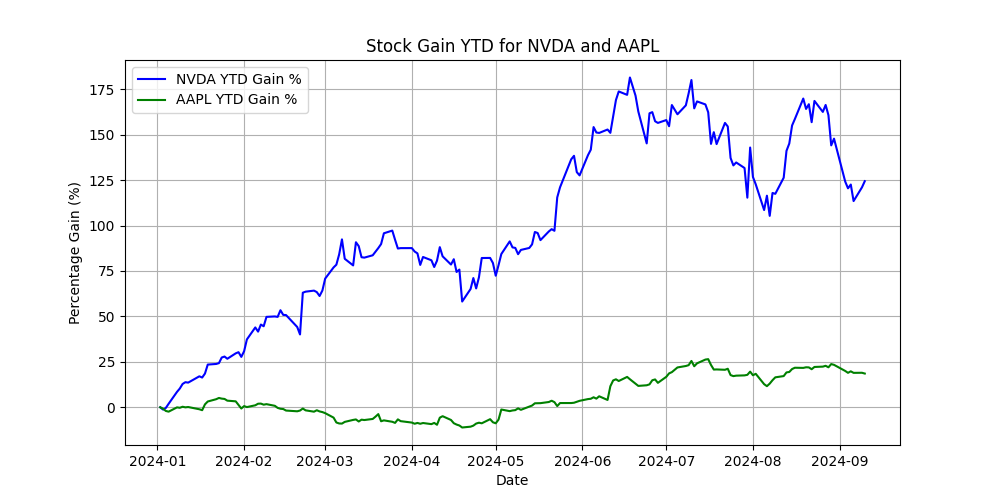

In [10]:
import os
from IPython.display import Image

Image(os.path.join("code", "ytd_stock_gains.png"))

Using user built functions

In [11]:
def get_stock_prices(stock_symbols, start_date, end_date):
    """Get the stock prices for the given stock symbols between
    the start and end dates.

    Args:
        stock_symbols (str or list): The stock symbols to get the
        prices for.
        start_date (str): The start date in the format
        'YYYY-MM-DD'.
        end_date (str): The end date in the format 'YYYY-MM-DD'.

    Returns:
        pandas.DataFrame: The stock prices for the given stock
        symbols indexed by date, with one column per stock
        symbol.
    """
    import yfinance

    stock_data = yfinance.download(
        stock_symbols, start=start_date, end=end_date
    )
    return stock_data.get("Close")

def plot_stock_prices(stock_prices, filename):
    """Plot the stock prices for the given stock symbols.

    Args:
        stock_prices (pandas.DataFrame): The stock prices for the
        given stock symbols.
    """
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 5))
    for column in stock_prices.columns:
        plt.plot(
            stock_prices.index, stock_prices[column], label=column
                )
    plt.title("Stock Prices")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.grid(True)
    plt.savefig(filename)

creting new executor

In [12]:
executor = LocalCommandLineCodeExecutor(
    timeout=60,
    work_dir="coding",
    functions=[get_stock_prices, plot_stock_prices],
)
code_writer_agent_system_message = code_writer.system_message +executor.format_functions_for_prompt()
code_writer_agent_system_message


'You are a helpful AI assistant.\nSolve tasks using your coding and language skills.\nIn the following cases, suggest python code (in a python coding block) or shell script (in a sh coding block) for the user to execute.\n    1. When you need to collect info, use the code to output the info you need, for example, browse or search the web, download/read a file, print the content of a webpage or a file, get the current date/time, check the operating system. After sufficient info is printed and the task is ready to be solved based on your language skill, you can solve the task by yourself.\n    2. When you need to perform some task with code, use the code to perform the task and output the result. Finish the task smartly.\nSolve the task step by step if you need to. If a plan is not provided, explain your plan first. Be clear which step uses code, and which step uses your language skill.\nWhen using code, you must indicate the script type in the code block. The user cannot provide any oth

Updating agents

In [13]:
code_exec = ConversableAgent(
    name="Code_Executor",
    llm_config=False,
    code_execution_config={"executor":executor},
    human_input_mode="ALWAYS",
)

code_writer = ConversableAgent(
    name="Code_Writer",
    llm_config=llm_config,
    system_message=code_writer_agent_system_message,
    human_input_mode="NEVER",
)

[autogen.oai.client: 09-11 22:31:14] {184} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.


In [14]:
chat = code_exec.initiate_chat(
    code_writer,
    message=f"Today is {today}."
    "Download the stock prices YTD for NVDA and AAPL and create"
    "a plot. Make sure the code is in markdown code block and "
    "save the figure to a file stock_prices_YTD_plot.png.",
)

Code_Executor (to Code_Writer):

Today is 2024-09-11.Download the stock prices YTD for NVDA and AAPL and createa plot. Make sure the code is in markdown code block and save the figure to a file stock_prices_YTD_plot.png.

--------------------------------------------------------------------------------
Code_Writer (to Code_Executor):

We first need to determine the start of the year date ("YTD"), which would be 2024-01-01 since the current year is 2024. Then we can retrieve the stock prices for NVDA and AAPL from January 1, 2024, to today (September 11, 2024). After fetching the data, we will plot the stock prices and save the figure to the file `stock_prices_YTD_plot.png`.

Here is the Python code to accomplish this:

```python
# filename: stock_prices_ytd.py
from functions import get_stock_prices, plot_stock_prices

# Define stock symbols and date range
stock_symbols = ['NVDA', 'AAPL']
start_date = '2024-01-01'
end_date = '2024-09-11'

# Fetch stock prices
stock_prices = get_stock_pri

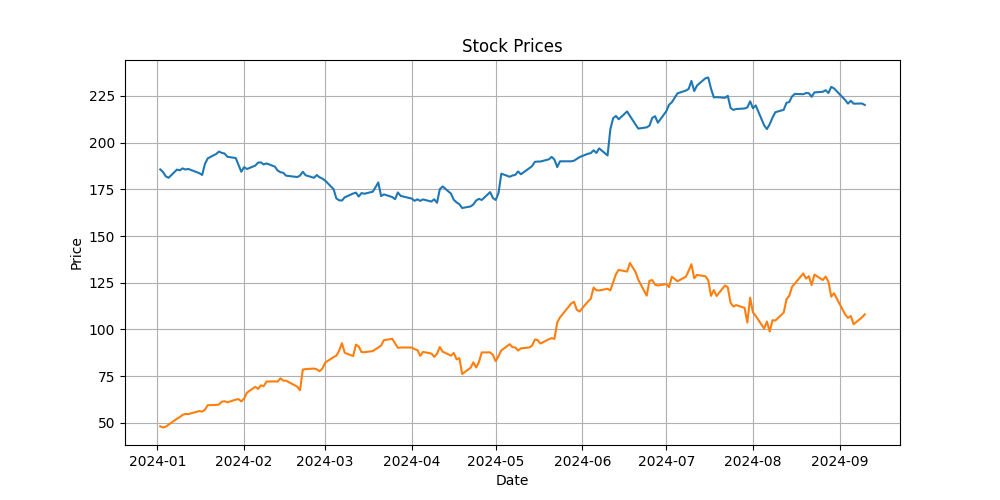

In [16]:
import os
from IPython.display import Image

Image(os.path.join("coding", "stock_prices_YTD_plot.png"))